# SUPERVISED - CLASSIFICATION - LOGISTIC REGRESSION

$$y = b_{0} + b_{1}x + \epsilon$$  

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification

# Load dataset
x, y = make_classification(n_samples=40, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
    # Set label 0 for 18% and 1 for rest 82% of observations
    # weights=[0.80],  
    random_state=42)
# data = load_iris()
# x = data.data
# y = (data.target == 0).astype(int)  # We classify whether it's Iris Setosa or not (binary classification)

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(x_train_scaler, y_train)

# Make predictions on the test data
x_test_scaler = scaler.transform(x_test)
y_pred = log_reg.predict(x_test_scaler)
print(f"length test: {len(y_test)}")
print(f"x_test_scaler:\n {x_test_scaler}")
print(f"y_test:\n {y_test}")
print(f"y_pred:\n {y_pred}")

length test: 8
x_test_scaler:
 [[ 0.03309944  0.38671788]
 [ 1.07153507 -1.76029134]
 [ 0.46297043  0.62815628]
 [ 1.44891579  0.94031524]
 [-0.35214596  0.47959705]
 [ 0.44510955 -1.05435091]
 [ 0.19544461  0.30898428]
 [-0.27724724 -1.05154713]]
y_test:
 [1 0 1 1 0 0 1 0]
y_pred:
 [1 0 1 1 1 0 1 0]


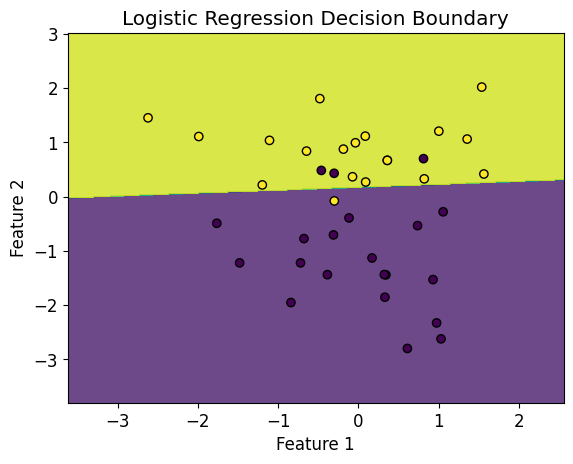

In [333]:
# Plot decision boundary
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01), 
    np.arange(y_min, y_max, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Logistic Regression Decision Boundary')
plt.show()


In [334]:
# Evaluate the model
print(f"y_test:\n {y_test}")
print(f"y_pred:\n {y_pred}")
conf_matrix = confusion_matrix(y_test, y_pred)

# classification_report
target_names = ['false (0)', 'true (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

# Manual
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
print(f"Confusion Matrix:\n{conf_matrix}")
print('True Positives(TP) = ', TP)
print('True Negatives(TN) = ', TN)
print('False Positives(FP) = ', FP)
print('False Negatives(FN) = ', FN)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
accuracy = (TP + TN) / len(y_test)
print(f"Accuracy (Manual): {accuracy * 100:.2f}%")

# Cuantos resultados predichos son correctos > de los 3 predichos los 3 son correctos
precision = TN / float(TN + FN)
print(f"Precision (false): {precision:.2f}%")
# Cuantos resultados predichos son correctos > de los 5 predichos los 4 son correctos
precision = TP / float(TP + FP)
print(f"Precision (true): {precision:.2f}%")
# Cuantos resultados predichos has acertado del total > hemos predicho 3 de los 4 reales
recall = TN / float(TN + FP)
print(f"Recall or Sensitivity (false): {recall:.2f}%")
# Cuantos resultados predichos has acertado del total > hemos predicho 4 de los 4 reales
recall = TP / float(TP + FN)
print(f"Recall or Sensitivity (true): {recall:.2f}%")
# f1-score es la media armónica ponderada de precisión y recall.


y_test:
 [1 0 1 1 0 0 1 0]
y_pred:
 [1 0 1 1 1 0 1 0]
              precision    recall  f1-score   support

   false (0)       1.00      0.75      0.86         4
    true (1)       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8

Confusion Matrix:
[[3 1]
 [0 4]]
True Positives(TP) =  4
True Negatives(TN) =  3
False Positives(FP) =  1
False Negatives(FN) =  0
Accuracy: 87.50%
Accuracy (Manual): 87.50%
Precision (false): 1.00%
Precision (true): 0.80%
Recall or Sensitivity (false): 0.75%
Recall or Sensitivity (true): 1.00%


Text(0.5, 19.52222222222222, 'Predicted label')

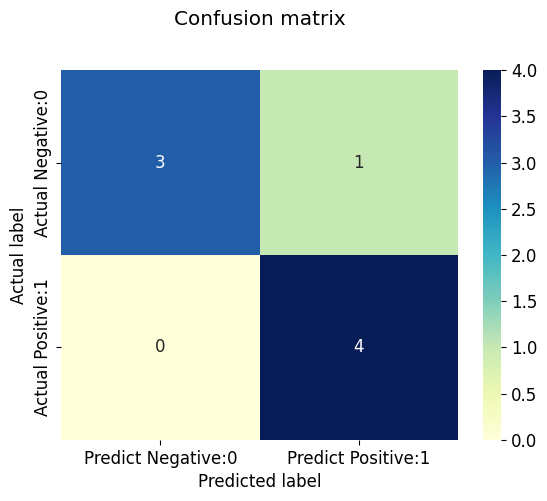

In [335]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=conf_matrix, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

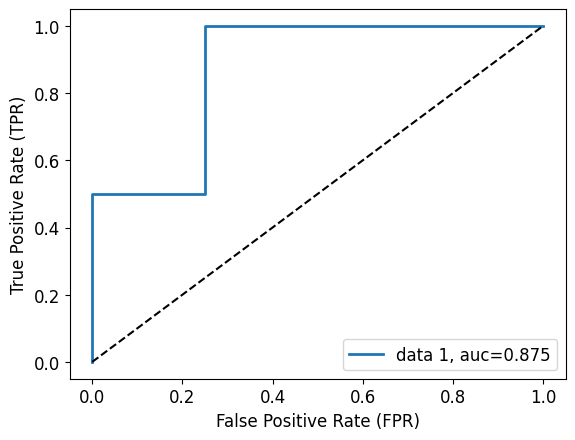

In [340]:
# predicted probabilities for class 1 (true) 
y_pred_proba = log_reg.predict_proba(x_test_scaler)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Receiver Operating Characteristic - Area Under Curve - Área bajo la curva. Es una técnica para comparar el rendimiento del clasificador.
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, linewidth=2, label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], 'k--' )
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

[0.61298931 0.01367107 0.71691639 0.81547734 0.66917372 0.06371403
 0.56803269 0.06929894]


Text(0, 0.5, 'Frequency')

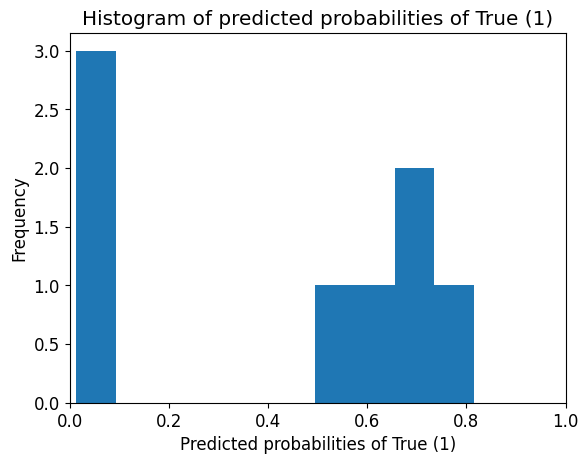

In [337]:
# plot histogram of predicted probabilities
print(y_pred_proba)

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred_proba, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of True (1)')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of True (1)')
plt.ylabel('Frequency')